# 05 Analysis of Variance

## 01 One-way analysis of variance

### 1. Data Structure

|그룹|1|…|i|…|k|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|<img src="https://latex.codecogs.com/svg.image?&space;x_{11}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{i1}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{k1}">|
|…||||||
|j|<img src="https://latex.codecogs.com/svg.image?&space;x_{1j}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{ij}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{kj}">|
|…||||||
|n|<img src="https://latex.codecogs.com/svg.image?&space;x_{1n}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{in}">||<img src="https://latex.codecogs.com/svg.image?&space;x_{kn}">|
|평균|<img src="https://latex.codecogs.com/svg.image?&space;\bar x_{1}">||<img src="https://latex.codecogs.com/svg.image?&space;\bar x_{i}">||<img src="https://latex.codecogs.com/svg.image?&space;\bar x_{k}">|

- Let <img src="https://latex.codecogs.com/svg.image?&space;x_{ij}"> denote observation no.j in group i
  - so that <img src="https://latex.codecogs.com/svg.image?&space;\bar x_{35}"> is the fifth observation in group 3
  - <img src="https://latex.codecogs.com/svg.image?&space;\bar x_{i}"> is the mean for group i and <img src="https://latex.codecogs.com/svg.image?&space;\bar x"> is the grand mean(average of all observations).

- Decompose <img src="https://latex.codecogs.com/svg.image?x_{ij}-\bar{x}=(x_{ij}-\bar{x_i})&plus;(\bar{x_i}-\bar{x})">
- Model <img src="https://latex.codecogs.com/svg.image?X_{ij}=\mu&plus;\alpha_i&plus;\epsilon_{ij},\;\;\;\epsilon_{ij}\sim&space;N(0,\sigma^2)">

### 2. Decomposition of Variation

Now consider the sums of squares of the underbraced terms, known as *variation within groups*

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_W=\sum_{i}\sum_{j}(x_{ij}-\bar{x_i})^2">
</center>

and *variation between groups*

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_B=\sum_{i}\sum_{j}(x_{i}-\bar{x})^2=\sum_{i}n_i(x_{i}-\bar{x})^2">
</center>

It is possible to prove that

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_B&plus;SSD_W=SSD_{total}=\sum_{i}\sum_{j}(x_{ij}-\bar{x})^2">
</center>


### 3. ANOVA table and test

- 분산분석표(Analysis of Variance Table)

|요인|제곱합|자유도|평균제곱|F값|
|:-:|:-:|:-:|:-:|:-:|
|그룹간|<img src="https://latex.codecogs.com/svg.image?SSD_B">|k-1|<img src="https://latex.codecogs.com/svg.image?MS_B">|<img src="https://latex.codecogs.com/svg.image?MS_B/MS_W">|
|그룹내|<img src="https://latex.codecogs.com/svg.image?SSD_W">|N-K|<img src="https://latex.codecogs.com/svg.image?MS_W">||
|합|<img src="https://latex.codecogs.com/svg.image?SSD_{total}">|N-1|||

- 검정 <img src="https://latex.codecogs.com/svg.image?&space;H_0:\alpha_1=\alpha_2=\cdots=\alpha_k\;\;vs\;\;H_1:\;not\;H_0">
- 검정통계량 <img src="https://latex.codecogs.com/svg.image?F_0=MS_B/MS_W\sim&space;F_{k-1,N-k}">

In [11]:
library(ISwR)
head(red.cell.folate,2)
attach(red.cell.folate)
summary(red.cell.folate)
anova(lm(folate~ventilation))

,folate,ventilation
,<dbl>,<fct>
1,243,"N2O+O2,24h"
2,251,"N2O+O2,24h"


The following objects are masked from red.cell.folate (pos = 3):

    folate, ventilation




     folate          ventilation
 Min.   :206.0   N2O+O2,24h:8   
 1st Qu.:249.5   N2O+O2,op :9   
 Median :274.0   O2,24h    :5   
 Mean   :283.2                  
 3rd Qu.:305.5                  
 Max.   :392.0                  

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ventilation,2,15515.77,7757.883,3.711336,0.04358933
Residuals,19,39716.10,2090.321,NA,NA


In [12]:
# (Recall) the data set "juul"
juul[c(6,350,450),]
anova(lm(igf1~tanner, data=juul))

,age,menarche,sex,igf1,tanner,testvol
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>
6,0.17,NA,1,101,I,NA
350,13.20,NA,1,NA,II,8
450,16.09,NA,1,412,V,18


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
tanner,4,12696217,3174054.15,228.3531,4.678213e-130
Residuals,787,10939116,13899.77,NA,NA


- Wrong!!! Since tanner is not a factor variable.
- This does not describe a group of data but a linear regression on the group number.  
Notive "1 DF" for the effect of tanner in the table.

In [13]:
# (Recall) the data set "juul": fix
juul$tanner <- factor(juul$tanner, labels=c("I", "II", "III", "IV", "V"))
summary(juul$tanner)
anova(lm(igf1~tanner, data=juul))

I   II  III   IV    V NA's 
 515  103   72   81  328  240

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
tanner,4,12696217,3174054.15,228.3531,4.678213e-130
Residuals,787,10939116,13899.77,NA,NA


## 02 Pairwise comparisons and multiple testing

### 1. Detecting a fidderence between groups

#### Difference shown by the F test(ANOVA)

- If the F test shows that there is a difference between groups, the question quickly arises of where the difference lies. It becomes necessary to compare the individual groups.
- F 테스트가 그룹간에 차이가 있다는 것을 보여주면, 어떤 차이가 있는지에 대한 질문이 빠르게 제기됩니다. 개별 그룹을 비교하는 것이 필요해집니다.

- Part of this information can be found in the regression coefficients.
- 이 정보 중 일부는 회귀 계수에서 찾을 수 있습니다.

In [14]:
summary(lm(folate~ventilation)) # 가변수 회귀모형


Call:
lm(formula = folate ~ ventilation)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.625 -35.361  -4.444  35.625  75.375 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            316.62      16.16  19.588 4.65e-14 ***
ventilationN2O+O2,op   -60.18      22.22  -2.709   0.0139 *  
ventilationO2,24h      -38.62      26.06  -1.482   0.1548    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45.72 on 19 degrees of freedom
Multiple R-squared:  0.2809,	Adjusted R-squared:  0.2052 
F-statistic: 3.711 on 2 and 19 DF,  p-value: 0.04359


- The interpretation of the estimates is that the intercept is the mean in the first group (N20+O2,24h), whereas the two others describe the difference between the relevant group and the first one.
- 추정치의 해석은 절편이 첫 번째 그룹(N20+O2,24h)의 평균이며, 다른 두 그룹은 해당 그룹과 첫 번째 그룹 간의 차이를 설명한다.

- Contrasts used by default are the so-called treatment contrasts, in which the first group is treated as a baseline and the other groups are given relative to that. Concretely, the analysis is performed as a multiple regression analysis by introducing two dummy variables, which are 1 for observations in the relevant group and 0 elsewhere.
- 기본적으로 사용되는 대조는 "처리 대조(treatment contrasts)"라고 불리며, 첫 번째 그룹이 기준선으로 취급되고 다른 그룹들은 그에 상대적으로 주어집니다. 구체적으로는, 분석은 해당 그룹의 관측값에 대해 1이 되는 두 개의 더미 변수(dummy variables)를 도입하여 다중 회귀 분석으로 수행됩니다. 다른 경우에는 0으로 처리됩니다.

- Among the t tests in the table, you can immediately find a test for the hypothesis that the first two groups have the same true mean (p=0.0139, reject) and also whether the first and the third might be identical (p=0.1548, not reject). However, a comparison of the last two groups cannot be found. This can be overcome by modifying the factor definition, but that gets tedious when there are more than a few groups.
- 표의 t 검정 중에서 첫 번째 두 그룹이 같은 실제 평균을 가지는지에 대한 가설검정(p=0.0139, 기각)과 첫 번째와 세 번째 그룹이 동일한지 여부도 확인할 수 있습니다 (p=0.1548, 기각하지 않음). 그러나 마지막 두 그룹을 비교하는 검정을 찾을 수 없습니다. 이는 요인 정의를 수정함으로써 극복할 수 있지만, 그룹이 몇 개 이상인 경우 번거로울 수 있습니다.

### 2. Pairwise test(pooled SD) and Bonferroni correction

- Multiple testing(다중 비교): If we want to compare all groups, we ought to correct for multiple testing. Performing many tests will increase the probability of finding one of them to be significant; that is, the p-values tend to be exaggerated. A common adjustment method is the Bonferroni correction.
- 다중 비교(Multiple testing): 모든 그룹을 비교하려면 다중 비교에 대해 보정해야 합니다. 많은 검정을 수행하면 그 중 하나가 유의미하다는 결과를 얻을 확률이 증가하며, 즉, p-값이 과장될 수 있습니다. 일반적인 보정 방법 중 하나는 본페로니 보정(Bonferroni correction)입니다.

- Multiplying the p-values by the number of tests, we obtain a conservative test where the probability of a significant result is less than or equal to the formal significance level.
- p-값을 검정 횟수로 곱하면, 형식적인 유의 수준 이하의 유의한 결과가 발생할 확률보다 작거나 같은 보수적인 검정 결과를 얻을 수 있습니다.

In [15]:
pairwise.t.test(folate, ventilation, p.adj="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  folate and ventilation 

          N2O+O2,24h N2O+O2,op
N2O+O2,op 0.042      -        
O2,24h    0.464      1.000    

P value adjustment method: bonferroni 

### 3. Not assuming equal variances

#### Relaxing the variance assumption

- The traditional one-way ANOVA requires an assumption of equal variances for all groups. There is, however, an alternative procedure that does not require that assumption. It is (due to Welch) similar to the unequal-variances t test. This has been implemented in the oneway.test function.
- 전통적인 일원분산분석은 모든 그룹의 등분산성을 가정합니다. 그러나 이 가정을 요구하지 않는 대안적인 절차가 있습니다. 웰치(Welch)에 의한 이 절차는 등분산성 t 검정과 유사합니다. 이 방법은 oneway.test 함수에 구현되어 있습니다.

In [16]:
oneway.test(folate~ventilation)


	One-way analysis of means (not assuming equal variances)

data:  folate and ventilation
F = 2.9704, num df = 2.000, denom df = 11.065, p-value = 0.09277


- In this case, the p-value increased to an insignificant value, presumably related to the fact that the group that seems to differ from the two others also has the largest variance.
- 이 경우, p-값이 유의하지 않은 값으로 증가했습니다. 이는 아마도 두 그룹과 다른 것으로 보이는 그룹이 가장 큰 분산을 가지고 있기 때문일 것으로 추정됩니다.

#### 4. Pairwise test not using pooled SD

- It is also possible to perform the pairwise t tests so that they do not use a common polled standard deviation. This is controlled by the argument pool.sd.
- pairwise t 검정을 수행할 때 공통된 풀링된 표준 편차를 사용하지 않도록 설정할 수도 있습니다. 이는 pool.sd 인수로 제어됩니다.

In [17]:
pairwise.t.test(folate, ventilation, pool.sd=F)


	Pairwise comparisons using t tests with non-pooled SD 

data:  folate and ventilation 

          N2O+O2,24h N2O+O2,op
N2O+O2,op 0.087      -        
O2,24h    0.321      0.321    

P value adjustment method: holm 

- Again, it is seen that the significance disappears as we remove the constraint on the variances.
- 다시 한 번, 분산에 대한 제약 조건을 제거하면 유의성이 사라지는 것을 확인할 수 있습니다.

### 5. Test for same variance - Bartlett's test

#### Test for same variance in all groups

- Testing whether the distribution of a variable has the same variance in all groups can be done using Bartlett's test, although like the F test for comparing tow variances, it is rather non-robust against departures from the assumption of normal distributions.
- 변수의 분포가 모든 그룹에서 동일한 분산을 가지는지를 검정하는 것은 바틀렛(Bartlett)의 검정을 사용하여 수행할 수 있습니다. 그러나 두 분산을 비교하는 F 검정과 마찬가지로, 정규 분포 가정에서 벗어나면 다소 강건하지 않습니다.

In [18]:
bartlett.test(folate~ventilation)


	Bartlett test of homogeneity of variances

data:  folate by ventilation
Bartlett's K-squared = 2.0951, df = 2, p-value = 0.3508


- nothing in the data contradicts the assumption of equal variances in the three groups.
- 데이터에는 세 그룹 간의 분산이 동일하다는 가정을 반박하는 요소가 없습니다.

### 6. Graphical presentation

#### Stripchart

- Plot where the raw data are plotted as a stripchart and overlaid with an indication of means and SEMs.
- 원시 데이터가 스트립차트(stripchart)로 플로팅되고, 각각의 평균과 SEM(표준 오차 평균)이 표시된 플롯입니다.

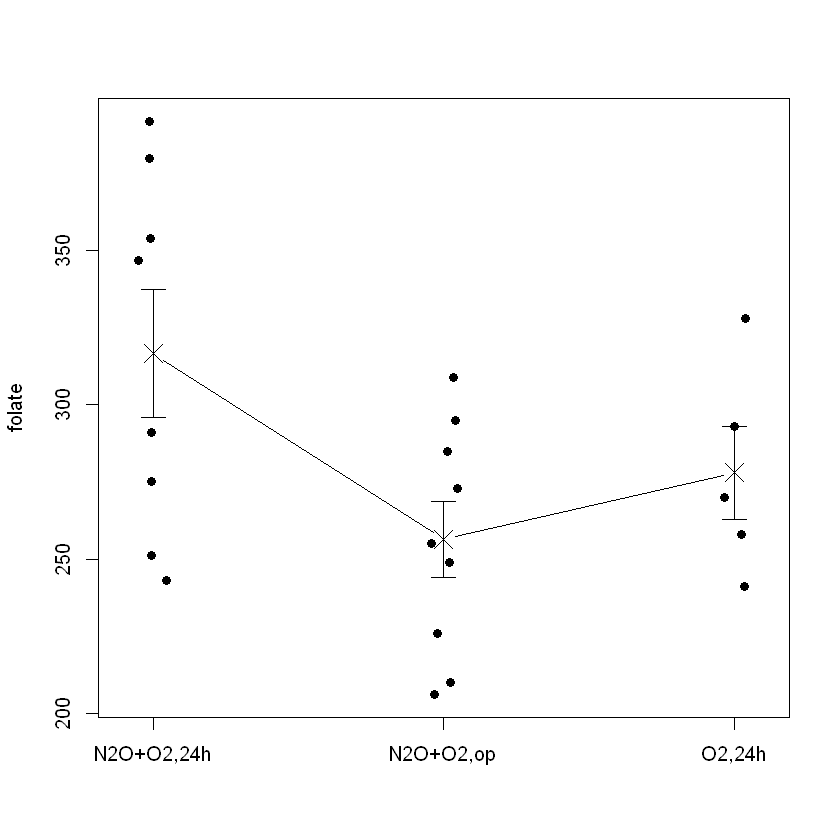

In [46]:
n <- tapply(folate, ventilation, length)
xbar <- tapply(folate, ventilation, mean)
s <- tapply(folate, ventilation, sd)
sem <- s/sqrt(n)
stripchart(folate~ventilation, method='jitter', jitter=0.05, pch=16, vert=T)
arrows(1:3, xbar+sem, 1:3, xbar-sem, angle=90, code=3, length=.1)
lines(1:3, xbar, pch=4, type='b', cex=2)


- In many fields it appears to have become the tradition to use 1 SEM "because they are the smallest"; that is, it makes differences look more dramatic.
- 많은 분야에서는 "그것들이 가장 작기 때문에" 1 SEM을 사용하는 것이 관행이 되었습니다. 즉, 차이를 더 강조하여 보이게 합니다.

## 03 Two-way analysis of variance

### 1. Decomposition of Variation

- Let <img src="https://latex.codecogs.com/svg.image?&space;x_{ij}"> denote the observation in row i and column j of the m×n table. This is similar to the notation used for one-way analysis of variance, but notice that there is now a connection between observations with the same j, so that it makes sense to look at both row averages <img src="https://latex.codecogs.com/svg.image?\bar{x_{i\cdot}}">, and column averages <img src="https://latex.codecogs.com/svg.image?\bar{x_{\cdot&space;j}}">. Here we restrict ourselves to the case of a single observation per cell.
- <img src="https://latex.codecogs.com/svg.image?x_{ij}">가 m×n 표의 i번째 행과 j번째 열의 관찰값을 나타낸다고 가정해봅시다. 이 표기법은 일원분산분석에서 사용되는 표기법과 유사하지만, 이제 동일한 j를 가진 관측치들 사이에 연결이 있으므로 행 평균 <img src="https://latex.codecogs.com/svg.image?\bar{x_{i\cdot}}">와 열 평균 <img src="https://latex.codecogs.com/svg.image?\bar{x_{\cdot&space;j}}">을 모두 살펴보는 것이 의미가 있다는 점에 유의하세요. 여기서는 셀당 하나의 관측치만 있는 경우에 대해서만 제한됩니다.

- Decompose <img src="https://latex.codecogs.com/svg.image?x_{ij}-\bar{x}=(\bar{x_{i\cdot}}-\bar{x})&plus;(\bar{x_{\cdot&space;j}}-\bar{x})&plus;(x_{ij}-\bar{x_{i\cdot}}-\bar{x_{\cdot&space;j}}&plus;\bar{x})">

Consequently, it now makes sense to look at both variation between rows

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_R=n\sum_{i}(\bar{x_{i\cdot}}-\bar{x})^2">
</center>

and variation between columns

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_C=m\sum_{j}(\bar{x_{\cdot&space;j}}-\bar{x})^2">
</center>

Subtracting these two from the total variation leaves the residual variation, which works out as

<center>
<img src="https://latex.codecogs.com/svg.image?SSD_{res}=\sum_{i}\sum_{j}(x_{ij}-\bar{x_{i\cdot}}-\bar{x_{\cdot&space;j}}&plus;\bar{x})^2">
</center>

- Model <img src="https://latex.codecogs.com/svg.image?X_{ij}=\mu&plus;\alpha_i&plus;\beta_j&plus;\epsilon_{ij},\;\;\epsilon_{ij}\sim&space;N(0,\sigma^2)">
- ex) heart rate after administration of enalaprilate (altman, 1991, p.327)
- 예시) 엔알라프릴레이트 투여 후 심박수 (Altman, 1991, p.327)

In [1]:
library(ISwR)
heart.rate[c(1, 10, 20, 28),]

Warning message:
"패키지 'ISwR'는 R 버전 4.3.3에서 작성되었습니다"


,hr,subj,time
,<dbl>,<fct>,<fct>
1,96,1,0
10,92,1,30
20,108,2,60
28,92,1,120


In [49]:
anova(lm(hr~subj+time, data=heart.rate))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
subj,8,8966.5556,1120.81944,90.639086,4.862680e-16
time,3,150.9722,50.32407,4.069637,1.802047e-02
Residuals,24,296.7778,12.36574,NA,NA
